In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [29]:
Temperature  = ctrl.Antecedent(np.arange(0, 55, 5), 'Temperature')
SoilMoisture = ctrl.Antecedent(np.arange(0, 105, 10), 'SoilMoisture')
AmountWater = ctrl.Consequent(np.arange(0, 255, 5), 'AmountWater')

In [60]:
Temperature["low"] = fuzz.trapmf(Temperature.universe, [0, 0,10, 25])
Temperature["medium"] = fuzz.trimf(Temperature.universe, [15, 25, 35])
Temperature["high"] = fuzz.trapmf(Temperature.universe, [25, 40,50, 50])

C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


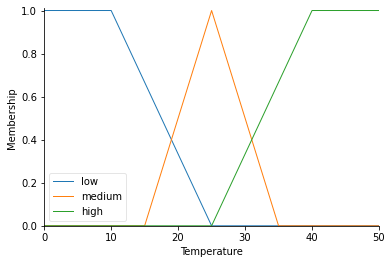

In [61]:
Temperature.view()

In [32]:
SoilMoisture["low"] = fuzz.trapmf(SoilMoisture.universe, [0, 0,20, 50])
SoilMoisture["medium"] = fuzz.trimf(SoilMoisture.universe, [30, 50, 70])
SoilMoisture["high"] = fuzz.trapmf(SoilMoisture.universe, [50,80,100, 100])

C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


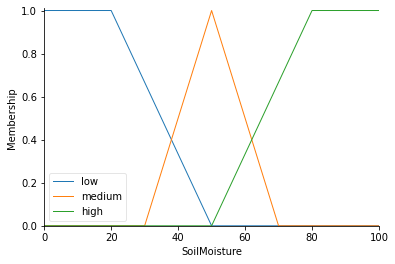

In [33]:
SoilMoisture.view()

In [42]:
AmountWater["minimum"] = fuzz.trapmf(AmountWater.universe, [0, 0,15, 30])
AmountWater["veryless"] = fuzz.trimf(AmountWater.universe, [15, 35, 55])
AmountWater["less"] = fuzz.trimf(AmountWater.universe, [30, 60, 85])
AmountWater["littleless"] = fuzz.trimf(AmountWater.universe, [55, 85, 110])
AmountWater["medium"] = fuzz.trimf(AmountWater.universe, [85, 110, 140])
AmountWater["littlemore"] = fuzz.trimf(AmountWater.universe, [110, 145, 170])
AmountWater["more"] = fuzz.trimf(AmountWater.universe, [140, 170, 195])
AmountWater["muchmore"] = fuzz.trimf(AmountWater.universe, [170, 195, 225])
AmountWater["maximum"] = fuzz.trapmf(AmountWater.universe, [195,225, 250, 250])

C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


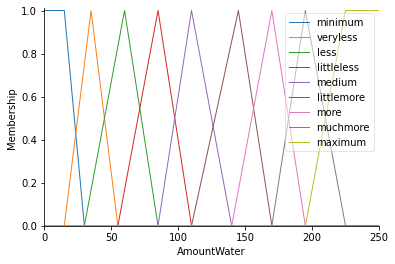

In [43]:
AmountWater.view()

In [44]:
rule0 = ctrl.Rule((Temperature["high"] & SoilMoisture["high"]),AmountWater["less"])
rule1 = ctrl.Rule((Temperature["medium"] & SoilMoisture["high"]),AmountWater["veryless"])
rule2 = ctrl.Rule((Temperature["low"] & SoilMoisture["high"]),AmountWater["minimum"])
rule3 = ctrl.Rule((Temperature["high"] & SoilMoisture["medium"]),AmountWater["littlemore"])
rule4 = ctrl.Rule((Temperature["high"] & SoilMoisture["low"]),AmountWater["maximum"])
rule5 = ctrl.Rule((Temperature["medium"] & SoilMoisture["low"]),AmountWater["muchmore"])
rule6 = ctrl.Rule((Temperature["medium"] & SoilMoisture["medium"]),AmountWater["medium"])
rule7 = ctrl.Rule((Temperature["low"] & SoilMoisture["medium"]),AmountWater["littleless"])
rule8 = ctrl.Rule((Temperature["low"] & SoilMoisture["low"]),AmountWater["more"])

In [45]:
Water_ctrl = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])

In [46]:
Water = ctrl.ControlSystemSimulation(Water_ctrl)

In [62]:
Water.input['Temperature'] = 34
Water.input['SoilMoisture'] = 55
Water.compute()

In [63]:
print (Water.output['AmountWater'])

116.79553482953985


In [49]:
Water.input['Temperature'] = 25
Water.input['SoilMoisture'] = 33
Water.compute()

In [50]:
print (Water.output['AmountWater'])

175.349739428442


C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


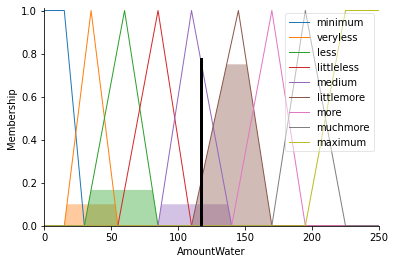

In [64]:
AmountWater.view(sim=Water)